## Component Form of NS Equations
The 2D constant density Navier-Stokes equation in component form can be written as: 
\begin{align*}
    \frac{\partial u}{\partial t} - \nu \triangle u + \left(u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y}\right) + \frac{\partial p}{\partial x} & = 0 \\
     \frac{\partial v}{\partial t} - \nu \triangle v + \left(u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y}\right) + \frac{\partial p}{\partial y} & = 0 \\ \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} &= 0\\
\end{align*}
With unkown functions: $u = u(x, y , t)$, the horizontal component; $v = v (x, y , t)$ the vertical component; and $p = p(x, y , t)$ is the pressure. 
## Staggered Grid 
We use a staggered grid as the pressure and the velocities components are naturally coupled including the fluxes. Also, it reduces convergence problems and oscillations. The solution domain is divided into a number of small control volumes (CV) by a grid which defines the control volume boundaries. In some cases ghost cells are used outside the computational domain. In a non-staggered, collocated grid, all variables share the same grid. In staggered grid, each function is stored in its own sub-grid shifted half a cell relative to the other sub-grids.
## Finite Volume Method (FVM)
The finite volume method uses the integral form of the conservation laws as the starting point. 
\begin{align*}
     \frac{\partial u}{\partial t} & = \frac{1}{\Delta x \Delta y} \left[ \int_{CV_u} \nu \Delta u \,dV - \int_{CV_u} \left(u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y}\right) \,dV - \int_{CV_u} \frac{\partial p}{\partial x} \,dV \right] \\
 \frac{\partial v}{\partial t} & = \frac{1}{\Delta x \Delta y} \left[ \int_{CV_v} \nu \Delta v \,dV - \int_{CV_v} \left(u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y}\right) \,dV - \int_{CV_v} \frac{\partial p}{\partial y} \,dV \right]
\end{align*}
Next is to convert control volume integrals to control surface integrals. For organization purposes, we label the flux terms on right hand side of the above equations, respectively, to diffusive ($D$), advective ($A$) and pressure ($P$). 
\begin{align*} 
    \frac{\partial u}{\partial t} = D_x - A_x - P_x \\
    \frac{\partial v}{\partial t} = D_y - A_y - P_y 
\end{align*}
The subscripts x and y denote direction in x and y not partial derivatives. For example, in the x-direction we have:
\begin{align*}
    D_x &= \frac{1}{\triangle x \triangle y} \int_{CV_u} \nu \triangle u \,dV &   A_x &= \frac{1}{\triangle x \triangle y} \int_{CV_u} \left(u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y}\right) \,dV & P_x &= \frac{1}{\triangle x \triangle y} \int_{CV_u} \frac{\partial p}{\partial x} \,dV 
\end{align*}
## Divergence / Discretization
We use the divergence theorem to relate the volume integral to the surface integral, then use the staggered grid to discretize the equations. The discretized equation for diffusion, advection and pressure are:
\begin{align*}
D_x &= \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x} \Delta y + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta y} \Delta x\\
D_y &= \frac{v_{i+1,j} - 2v_{i,j} + v_{i-1,j}}{\Delta x} \Delta y + \frac{v_{i,j+1} - 2v_{i,j} + v_{i,j-1}}{\Delta y} \Delta x 
\end{align*}

\begin{align*}
A_x &= (uu)_e \Delta y - (uu)_w \Delta y + (uv)_n \Delta x -  (uv)_s \Delta x 
\end{align*}
with
\begin{align*}
u_e &= \frac{1}{2}(u_{i+1,j} + u_{i,j})   &  u_n &= \frac{1}{2}(u_{i,j+1} + u_{i,j}) &  v_n &= \frac{1}{2}(v_{i-1,j+1} + v_{i,j+1})\\
u_w &= \frac{1}{2}(u_{i,j} + u_{i+1,j})   &  u_s &=\frac{1}{2}(u_{i,j} + u_{i,j-1}) &  v_s &= \frac{1}{2}(v_{i-1,j} + v_{i,j})
\end{align*}

\begin{align*}
A_y = (vu)_e \Delta y - (vu)_w \Delta y + (vv)_n \Delta x -  (vv)_s \Delta x 
\end{align*}
with
\begin{align*}
u_e &= \frac{1}{2}(u_{i+1,j-1} + u_{i+1,j})   &  v_e &= \frac{1}{2}(v_{i,j} + v_{i+1,j})  & v_n &= \frac{1}{2}(v_{i,j} + v_{i,j+1}) \\
u_w &= \frac{1}{2}(u_{i,j-1} + u_{i,j})   &  v_w &=\frac{1}{2}(v_{i,j} + v_{i-1,j}) & v_s &= \frac{1}{2}(v_{i,j} + v_{i,j-1})  
\end{align*}

\begin{align*}
P_x &= (p_{i,j}-p_{i-1,j}) \Delta y \\
P_y &= (p_{i,j}-p_{i-1,j}) \Delta x
\end{align*}
## Projection Method
We solve for velocity and pressure in steps, rather than simultaneously. This is possible by the projection method. The theoretical background of the projection method, where we solve for the pressure and the velocity in steps, is the Helmholtz-Hodge decomposition. The Helmholtz-Hodge decomposition states that a well-behaved vector field can be decomposed into an incompressible rotational and a compressible irrotational components. 
### Pressure Poisson Equation
Using the vector form of Navier-Stokes equation to solve for pressure gradient; it provides the Pressure Poisson Equation: 
\begin{equation*} 
     \nabla_h^2 p_{i,j} = \frac{\nabla \cdot \vec{W}_{i,j}^{n}}{\Delta t} -\nabla  \cdot A_{i,j}^n + \nabla  \cdot D_{i,j}^n   
\end{equation*}
Where superscript $n$ denotes the current time level.
### Velocity Update
After solving Poisson equation for pressure and we then use that pressure to update the velocity field. From the vector form of Navier-Stokes equation; the next time level velocity ($\tilde{\vec{W}}_{i,j}^{n+1}$) can be solved for:
\begin{equation*} 
    \tilde{\vec{W}}_{i,j}^{n+1} = \vec{W}_{i,j}^{n} + \Delta t \left(D_{i,j}^n -A_{i,j}^n - \nabla p_{i,j}\right)
\end{equation*}

## Python Implementation

Reynolds Number: 1000.0
dt= 0.0004
total time 0.140625 s
time per timestep = 0.0140625 s
mom assembly time 0.0 s
solver time 0.140625 s
solver fraction = 100.0 %


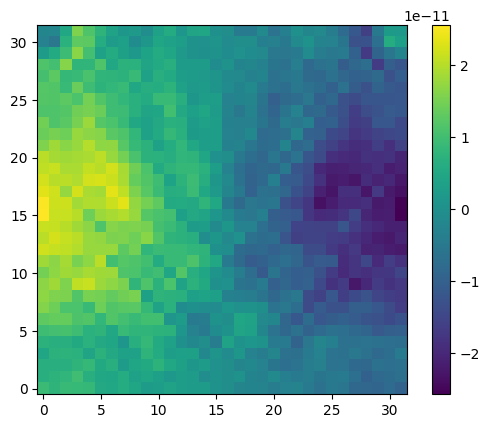

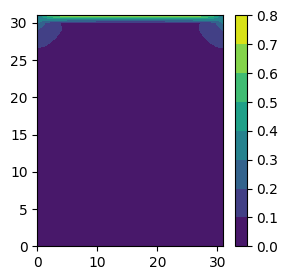

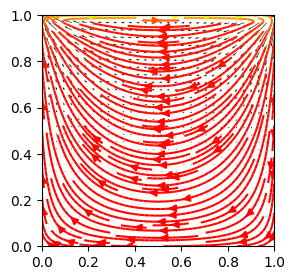

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from time import process_time
import sys

# USE sparse solver
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg as ssl

# define some parameters
nx = 32
ny = 32
nu = 0.01 # dynamic viscosity
lx = 1.0
ly = 1.0
dx = lx/nx
dy = ly/ny
t = 0.0

Ut = 10.0  # top boundary condition (moving lid, fluid sticks to it, has same velocity)
Ub = 0.0 # bottom (fluid sticks to wall, no-slip boundary condition)
Vl = 0.0 # left wall
Vr = 0.0  # right wall

print('Reynolds Number:', Ut*lx/nu)
dt = min(0.25*dx*dx/nu, 4.0*nu/Ut/Ut)  # related to convergence, CFL = Courant–Friedrichs–Lewy condition
print('dt=', dt) # time step must be small for convergence

# initialize velocities - we stagger everything in the negative direction. A scalar cell owns its minus face, only.
u = np.zeros([ny+2, nx+2]) # include ghost cells at old time step n
v = np.zeros([ny +2, nx+2]) # include ghost cells
ut = np.zeros_like(u) # u-tilde (from Helmholtz-Hodge decomposition)
vt = np.zeros_like(u)    # v-tilde (from Helmholtz-Hodge decomposition)

# initialize the pressure
p = np.zeros([ny+2,nx+2]); # include ghost cells

# build pressure coefficient matrix
Ap = np.zeros([ny,nx])
Ae = 1.0/dx/dx*np.ones([ny,nx])
As = 1.0/dy/dy*np.ones([ny,nx])
An = 1.0/dy/dy*np.ones([ny,nx])
Aw = 1.0/dx/dx*np.ones([ny,nx])
# set wall coefs
Aw[:,0] = 0.0
Ae[:,-1] = 0.0
An[-1,:] = 0.0
As[0,:] = 0.0
Ap = -(Aw + Ae + An + As)

n = nx*ny
d0 = Ap.reshape(n)
de = Ae.reshape(n)[:-1]
dw = Aw.reshape(n)[1:]
ds = As.reshape(n)[nx:]
dn = An.reshape(n)[:-nx]
A = scipy.sparse.diags([d0, de, dw, dn, ds], [0, 1, -1, nx, -nx], format='csr')
#plt.matshow((A.toarray()))
#plt.show() 

t0 = process_time()
momentum_time = 0.0
solvertime = 0.0
nsteps = 10

for n in range(0,nsteps): # time steps
    u[:,1] = 0.0 
    u[:,-1] = 0.0   
    u[-1,:] = 2.0*Ut - u[-2,:]     
    u[0,:] = 2.0*Ub - u[1,:]   
    v[:,0] = 2.0*Vl - v[:,1]    
    v[:,-1] = 2.0*Vr - v[:,-2] 
    v[1,:] = 0.0 
    v[-1,:] = 0.0    
  
    # do x-momentum first 
    tic = process_time()

    ue=0.5 * (u[1:ny+1,3:nx+2] + u[1:ny+1,2:nx+1])
    uw = 0.5 * (u[1:ny+1,2:nx+1] + u[1:ny+1,1:nx])
    un = 0.5 * (u[2:ny+2,2:nx+1] + u[1:ny+1,2:nx+1])      
    us = 0.5 * (u[1:ny+1,2:nx+1] + u[0:ny,2:nx+1])            
    vn = 0.5 * (v[2:ny+2,2:nx+1] + v[2:ny+2,1:nx])
    vs = 0.5 * (v[1:ny+1,2:nx+1] + v[1:ny+1,1:nx])

    convection_u = - (ue*ue - uw*uw)/dx - (un*vn - us*vs)/dy

    diffusion_u = nu*( (u[1:ny+1,3:nx+2] - 2.0*u[1:ny+1,2:nx+1] + u[1:ny+1,1:nx])/dx/dx + (u[2:ny+2,2:nx+1] - 2.0*u[1:ny+1,2:nx+1] + u[0:ny,2:nx+1])/dy/dy )

    ut[1:ny+1,2:nx+1] = u[1:ny+1,2:nx+1] + dt *(convection_u + diffusion_u)         

                
    # do y-momentum 
    ve = 0.5*(v[2:ny+1,2:nx+2] + v[2:ny+1,1:nx+1])
    vw = 0.5*(v[2:ny+1,1:nx+1] + v[2:ny+1,0:nx])    
    ue = 0.5*(u[2:ny+1,2:nx+2] + u[1:ny,2:nx+2])
    uw = 0.5*(u[2:ny+1,1:nx+1] + u[1:ny,1:nx+1])
    vn = 0.5*(v[3:ny+2,1:nx+1] + v[2:ny+1,1:nx+1])
    vs = 0.5*(v[2:ny+1,1:nx+1] + v[1:ny,1:nx+1])            

    convection_v = - (ue*ve - uw*vw)/dx - (vn*vn - vs*vs)/dy
            
    diffusion_v = nu*( (v[2:ny+1,2:nx+2] - 2.0*v[2:ny+1,1:nx+1] + v[2:ny+1,0:nx])/dx/dx + (v[3:ny+2,1:nx+1] - 2.0*v[2:ny+1,1:nx+1] + v[1:ny,1:nx+1])/dy/dy )
            
    vt[2:ny+1,1:nx+1] = v[2:ny+1,1:nx+1] + dt*(convection_v + diffusion_v)            

    # do pressure - prhs = 1/dt * div(uhat)
    divut = np.zeros([ny+2,nx+2]) 
    divut[1:-1,1:-1] = (ut[1:-1,2:] - ut[1:-1,1:-1])/dx + (vt[2:,1:-1] - vt[1:-1,1:-1])/dy

    prhs = 1.0/dt * divut
    toc = process_time()
    momentum_time += (toc - tic)
    
    ###### Use the sparse linear solver
    tic=process_time()
    #pt = scipy.sparse.linalg.spsolve(A1,prhs[1:-1,1:-1].ravel()) #theta=sc.linalg.solve_triangular(A,d)
    #pt,info = ssl.bicg(A,prhs[1:-1,1:-1].ravel(),tol=1e-10) #theta=sc.linalg.solve_triangular(A,d)
    #pt,info = ssl.cg(A,prhs[1:-1,1:-1].ravel(),tol=1e-10)
    #pt,info = ssl.bicgstab(A,prhs[1:-1,1:-1].ravel(),tol=1e-10)
    pt,info = ssl.gmres(A,prhs[1:-1,1:-1].ravel(),tol=1e-10)
    #pt,info = ssl.lgmres(A,prhs[1:-1,1:-1].ravel(),tol=1e-10)
    if info != 0.0:
        sys.exit("Problem with pressure solver")
    toc=process_time()
    solvertime += toc - tic
    p[1:-1,1:-1] = pt.reshape([ny,nx])

    # time advance
    u[1:-1,2:-1] = ut[1:-1,2:-1] - dt * (p[1:-1,2:-1] - p[1:-1,1:-2])/dx
    v[2:-1,1:-1] = vt[2:-1,1:-1] - dt * (p[2:-1,1:-1] - p[1:-2,1:-1])/dy       
    
    t += dt
tend = process_time()
totaltime = tend - t0
print('total time', totaltime, 's')
print('time per timestep =',totaltime/nsteps, 's')
print('mom assembly time', totaltime - solvertime, 's')
print('solver time', solvertime, 's')
print('solver fraction =', np.ceil(solvertime/(tend - t0)*100),'%')

divu = (u[1:-1,2:] - u[1:-1,1:-1])/dx + (v[2:,1:-1] - v[1:-1,1:-1])/dy
plt.imshow(divu,origin='lower')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=[3,3],dpi=100)
ucc = 0.5*(u[1:-1,2:] + u[1:-1,1:-1])  # average to the p-grid
vcc = 0.5*(v[2:,1:-1] + v[1:-1,1:-1])   # average to the p-grid
speed = np.sqrt(ucc*ucc + vcc*vcc)
plt.contourf(speed)
plt.colorbar()
plt.show()

x = np.linspace(0,lx,nx)
y = np.linspace(0,ly,ny)
xx,yy = np.meshgrid(x,y)
nn = 1
fig = plt.figure(figsize=[3,3],dpi=100)
plt.quiver(xx[::nn,::nn],yy[::nn,::nn],ucc[::nn,::nn],vcc[::nn,::nn])
plt.xlim([xx[0,0],xx[0,-1]])
plt.ylim([yy[0,0],yy[-1,0]])
# ax.set_xlim([xx[0,0],xx[0,-1]])
plt.streamplot(xx,yy,ucc, vcc, color=np.sqrt(ucc*ucc + vcc*vcc),density=1.5,cmap=plt.cm.autumn,linewidth=1.5)
plt.show()

## GPU Accelerated
### Access Cupy library:
```
import cupy as np
```
### Access Sparse solvers:
```
import cupyx.scipy.linalg
from cupyx.scipy import sparse
import cupyx.scipy.sparse.linalg as ssl
```